In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('files/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
data.shape

(1338, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<AxesSubplot:>

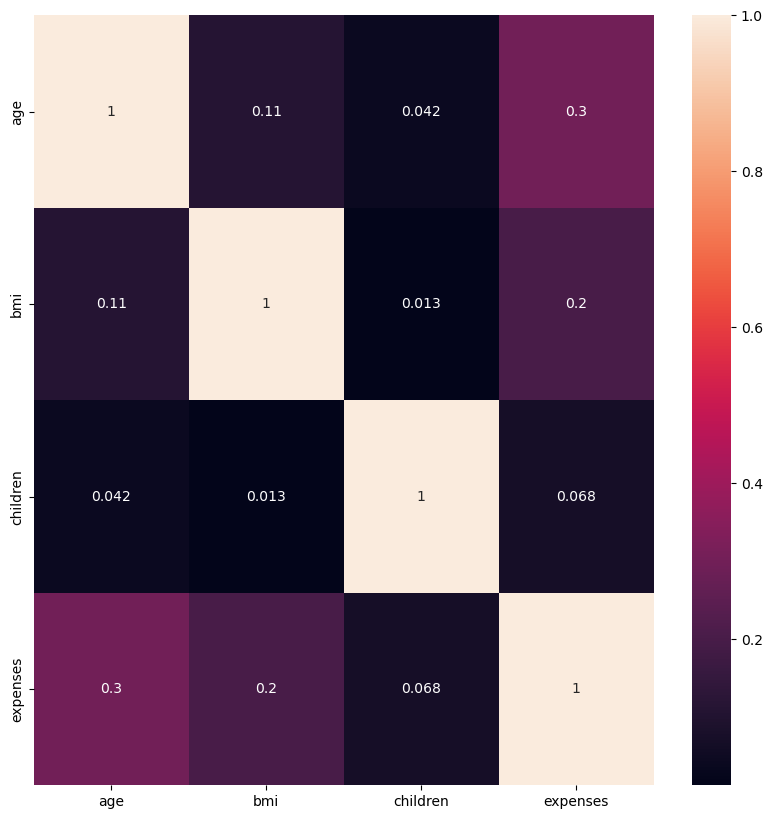

In [6]:
fig, ax = plt.subplots(figsize=(10,10))
corr = data.corr()
sns.heatmap(corr, annot=True, ax = ax)

In [12]:
d_types = dict(data.dtypes)
for name, type_ in d_types.items():
    if str(type_) == 'object':
        print(f"========= {name} ==========")
        print(data[name].value_counts())
        print()


========= sex ==========
male      676
female    662
Name: sex, dtype: int64

========= smoker ==========
no     1064
yes     274
Name: smoker, dtype: int64

========= region ==========
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64



In [13]:
from sklearn.preprocessing import LabelEncoder

for name, type_ in d_types.items():
    if str(type_) == 'object':
        le = LabelEncoder()
        data[name] = le.fit_transform(data[name])

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


<AxesSubplot:>

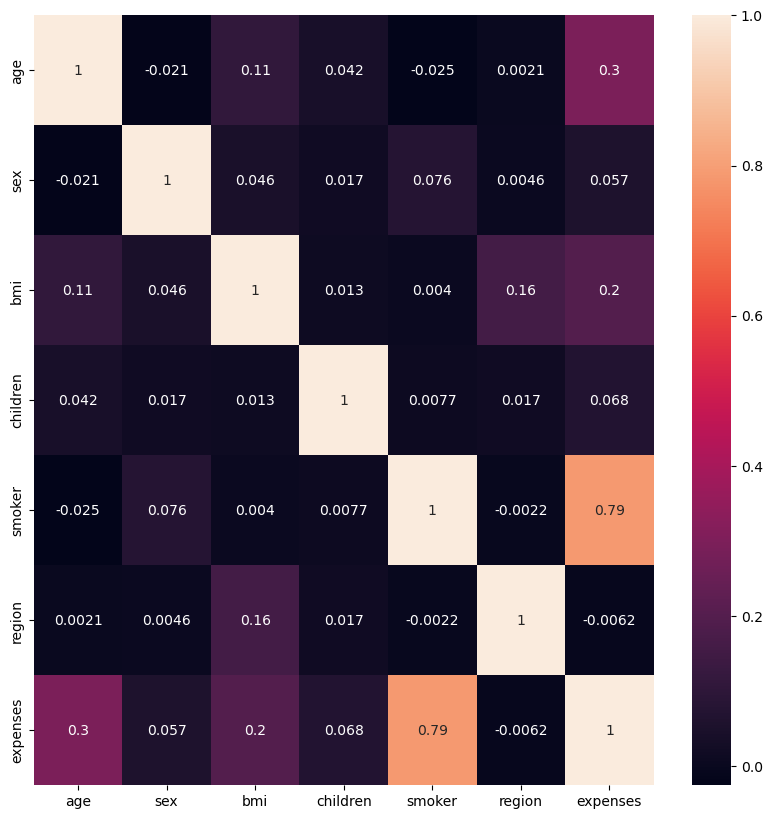

In [15]:
fig, ax = plt.subplots(figsize=(10,10))
corr = data.corr()
sns.heatmap(corr, annot=True, ax = ax)

In [20]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values

In [21]:
X.shape, Y.shape

((1338, 6), (1338,))

In [33]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y, test_size = 0.2, random_state=3)

In [34]:
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()
Xtrain = Scaler.fit_transform(Xtrain)
Xtest = Scaler.fit_transform(Xtest)

In [36]:
Xtrain.shape, Xtest.shape

((1070, 6), (268, 6))

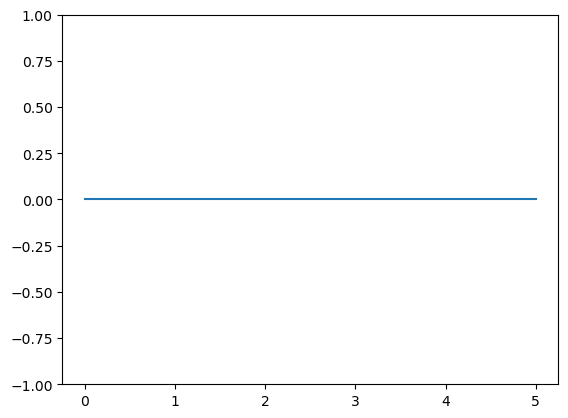

In [38]:
plt.ylim(-1,1)

means = []
for i in range(X.shape[1]):
    means.append(np.mean(Xtest[:,i]))

plt.plot(means,scaley=False)

In [40]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(Xtrain, Ytrain)

LinearRegression()

In [41]:
model.coef_

array([3668.96061241, -107.95514822, 2065.57975534,  697.14116666,
       9581.95890053, -378.948381  ])

In [42]:
model.intercept_

13222.990859813064

In [43]:
model.coef_.dot(Xtest[10, :]) + model.intercept_

11748.488825018001

In [44]:
model.predict(Xtest[10,:].reshape(1,-1))

array([11748.48882502])